# Analysis Fee Recommendation

### A. Pre-Proccessing
#### 0. Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Read Dataset

In [41]:
df = pd.read_csv('DataFeeColl_num3.csv')

In [42]:
df.head(2)

,Profcoll_Fee,NTF,OSP,DPD_Beginning,AMT_LLP_Beginning,AMT_LLP_Projection,Price_List,OS_LC
0,12250000,58745500.00,41258471.29,166,2.062924e+07,4.125847e+07,48216001.75,1654179.93
1,1200000,4743877.55,4743877.55,30,1.660357e+05,4.981071e+05,7200000.00,0.00


In [43]:
df.shape

(890, 8)

In [44]:
df.columns

Index(['Profcoll_Fee', 'NTF', 'OSP ', 'DPD_Beginning', 'AMT_LLP_Beginning',
       'AMT_LLP_Projection', 'Price_List', 'OS_LC'],
      dtype='object')

In [54]:
numericals = ['Profcoll_Fee', 'NTF', 'OSP ', 'DPD_Beginning', 'AMT_LLP_Beginning','AMT_LLP_Projection', 'Price_List', 'OS_LC']

#### 2. Check Data Format, Missing, and Duplicate Value

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Profcoll_Fee        890 non-null    int64  
 1   NTF                 890 non-null    float64
 2   OSP                 890 non-null    float64
 3   DPD_Beginning       890 non-null    int64  
 4   AMT_LLP_Beginning   890 non-null    float64
 5   AMT_LLP_Projection  890 non-null    float64
 6   Price_List          890 non-null    float64
 7   OS_LC               890 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 55.7 KB


In [46]:
df.isna().sum()

Profcoll_Fee          0
NTF                   0
OSP                   0
DPD_Beginning         0
AMT_LLP_Beginning     0
AMT_LLP_Projection    0
Price_List            0
OS_LC                 0
dtype: int64

In [47]:
df.isnull().sum()

Profcoll_Fee          0
NTF                   0
OSP                   0
DPD_Beginning         0
AMT_LLP_Beginning     0
AMT_LLP_Projection    0
Price_List            0
OS_LC                 0
dtype: int64

### B. Exploratory Data Analysis (EDA)

#### 1. Data Understanding

In [48]:
df.describe()

,Profcoll_Fee,NTF,OSP,DPD_Beginning,AMT_LLP_Beginning,AMT_LLP_Projection,Price_List,OS_LC
count,8.900000e+02,8.900000e+02,8.900000e+02,890.000000,8.900000e+02,8.900000e+02,8.900000e+02,8.900000e+02
mean,2.809888e+06,2.003576e+07,1.282308e+07,347.514607,6.656340e+06,7.531782e+06,2.012595e+07,1.045956e+06
std,3.945953e+06,3.648509e+07,2.402536e+07,424.082383,1.473593e+07,1.678340e+07,3.401083e+07,3.366407e+06
min,4.000000e+05,2.584694e+06,2.644875e+05,9.000000,7.043986e+04,1.621451e+05,1.700000e+06,0.000000e+00
25%,1.200000e+06,5.754082e+06,2.781979e+06,77.000000,7.490675e+05,1.080984e+06,5.700000e+06,0.000000e+00
50%,1.300000e+06,7.482210e+06,4.790614e+06,167.000000,2.104327e+06,2.450030e+06,8.300000e+06,1.753318e+05
75%,1.500000e+06,1.007245e+07,7.509982e+06,472.500000,4.985941e+06,5.368974e+06,1.200000e+07,7.668888e+05
max,2.750000e+07,2.604960e+08,1.821710e+08,3421.000000,9.904655e+07,1.739394e+08,2.930000e+08,4.677783e+07


Observation:
* Mean > 50% (Median) in  `Profcoll_Fee`, `NTF`, `OSP`, `DPD_Beginning`, `AMT_LLP Beginning`, `AMT_LLP_Projection`, column, indicating both are slight positively skewed distribution
* Mean < 50% (Median) in  `Price_List`, `OSP_LC` column, indicating both are slight negatively skewed distribution

#### 2. The Boxplots

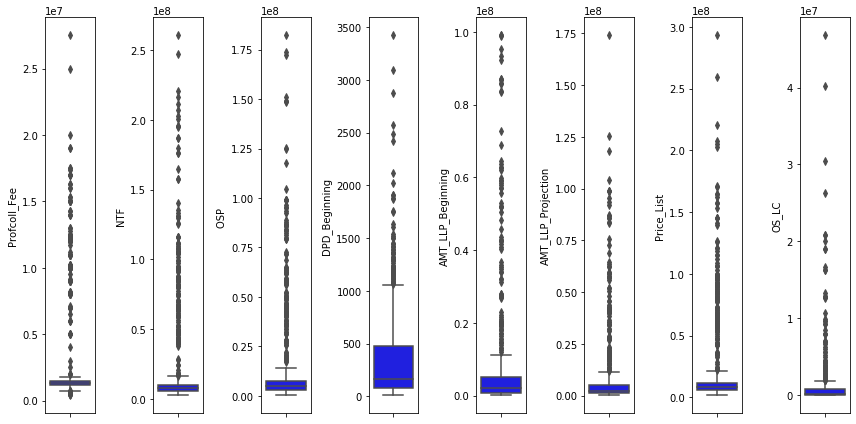

In [55]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue')
    plt.tight_layout()

Observation:
- Too much outlier for each feature in dataset
    
    Dropping the outlier will not be an advise for this case, since the value is too much. But, if the next step we need to do a forecast for this fee, will need to get more data sample, or using the advance method such as random forest.

#### 3. The KDE Plots (Distribution Plots)

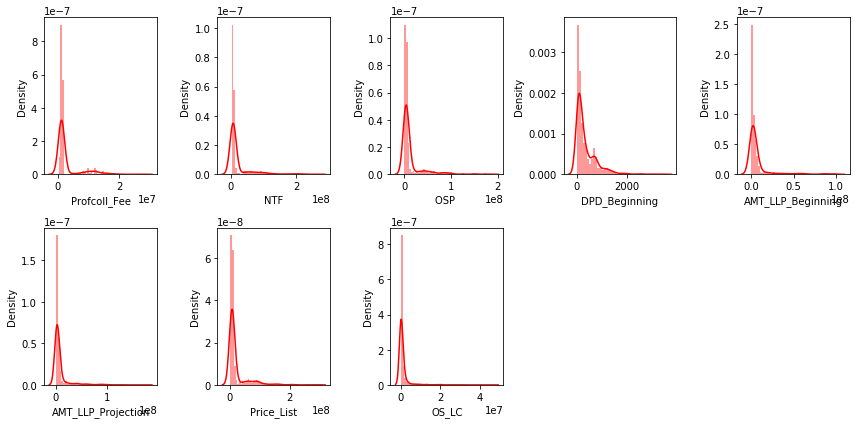

In [65]:
## KDE plot for knowing the distribution form
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. All features here is skewed.
2. This data is not proper yet if need more analysis such as regression

#### 4. The Correlation Plot

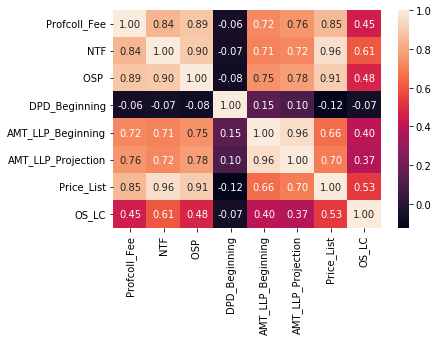

In [61]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
1. We have 3 features are highly correlated into `Profcoll_Fee`; `OSP`, `Price_List`, and `NTF`
2. Will need to drop `OSP` and `Price_List` if next this data are using for modelling the `Profcoll_Fee`

# EDA Conclusion
1. This data contains many issues on the value. This dataset have not `NULL` or duplicated values, but have so much outlier for each features. An Advise for the next analysis, we can do binning for each features also get more data, so we can do an analysis with a richer dataset.
2. Since this data depends on the asset for each record, it's better to have feature `product` to separate the analysis.
3. All the features here are skewed.
4. Based on current dataset, we have 3 features are highly correlated into `Profcoll_Fee`, they are `OSP`, `Price_List`, and `NTF`
5. Will need to drop `OSP` and `Price_List` if next this data are using for modelling the `Profcoll_Fee`